# Predict Responses to Marketing Campaign 

## Import required libraries

In [1]:
#pip install imblearn

In [2]:
# Import Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from imblearn.over_sampling import SMOTE 

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
#from sklearn.metrics import 

from datetime import datetime

## Load Data

In [3]:
data = pd.read_csv('marketing_campaign.csv') # Load data from CSV file

## EDA

In [4]:
data.head() # show the first rows to understand the data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
data.info() # show information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [6]:
data.describe() # show some data statistics

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

### Cleaning & Feature engineering

In [7]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer']) # fix datatype

In [8]:
# fill missing income with the mean of the same level of education
data['Income'] = data['Income'].groupby(data['Education']).apply(lambda x: x.fillna(x.mean())) 

In [9]:
# Instead of Year_Birth , we convert it to Age 
currentYear = datetime.now().year

data['Age'] = currentYear - data['Year_Birth']
data['Age'].head()

0    64
1    67
2    56
3    37
4    40
Name: Age, dtype: int64

In [10]:
#Number of days the customer is enrolled with the company from Dt_Customer
data['Days_is_client'] = (datetime.now() - data['Dt_Customer']).dt.days

In [11]:
# calculate the total accepted offer 
data['accepted_offers'] = data['AcceptedCmp3'] + data[ 'AcceptedCmp4'] + data[ 'AcceptedCmp5'] + data[ 'AcceptedCmp1'] + data[ 'AcceptedCmp2']

In [12]:
# calculate the total Spending in all products
data['Spending'] =  data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']    

In [13]:
# calculate the total number of purchases from all channels
data['NumAllPurchases'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

In [14]:
###############################
#def weird_division(n, d):
#    return n / d if d else 0

In [15]:
# calculate the Average Check from two prevuies columns

data['AverageCheck'] = round((data['Spending'] / data['NumAllPurchases']), 1)
data['AverageCheck'] = data['AverageCheck'].fillna(0)

In [16]:
# the ratio of DealsPurchases out of all purchases
data['ShareDealsPurchases'] = round((data['NumDealsPurchases'] / data['NumAllPurchases']) * 100, 1)
data['ShareDealsPurchases'] = data['ShareDealsPurchases'].fillna(0)

In [17]:
# find the columns that only contains one value in all the records
for col in data.columns :
    if len(data[col].value_counts()) == 1 :
        print(data[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


In [18]:
# Remove un-needed columns
data = data.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue','Year_Birth']) 

### Outliers

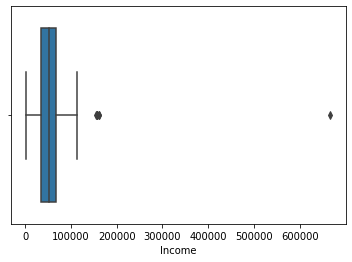

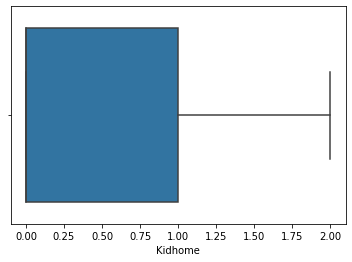

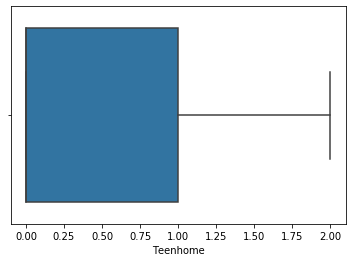

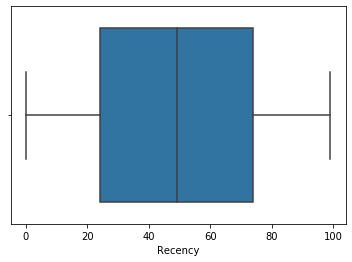

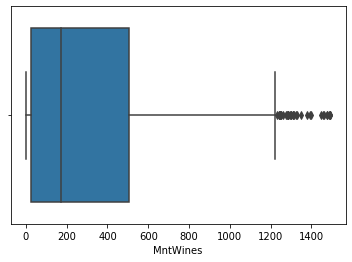

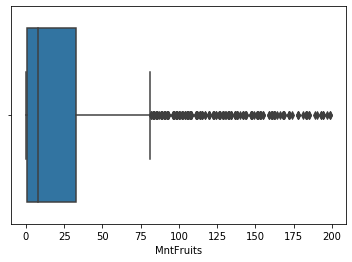

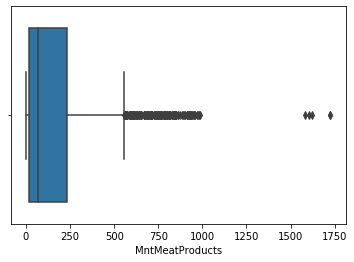

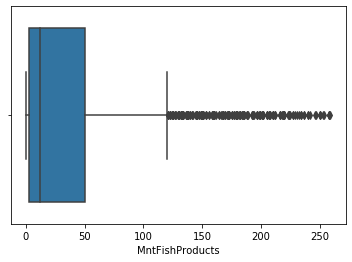

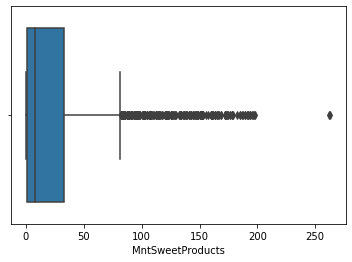

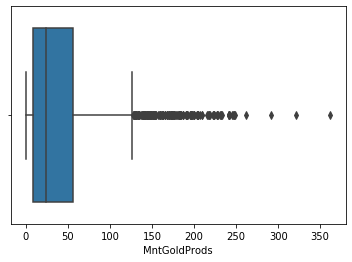

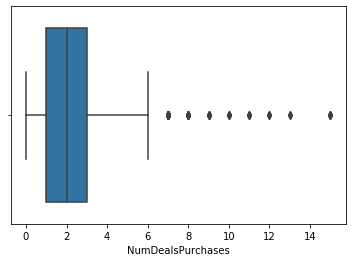

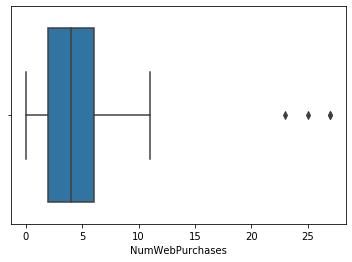

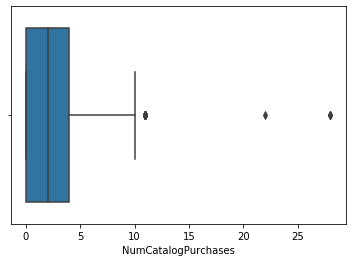

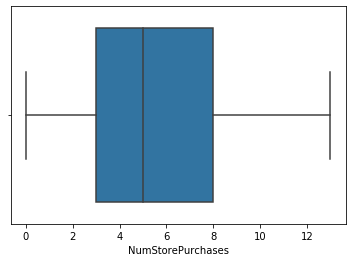

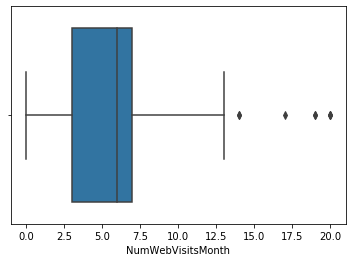

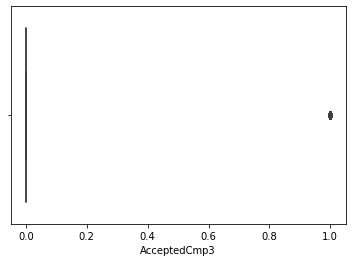

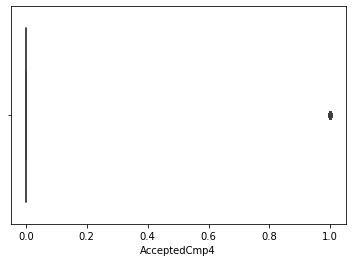

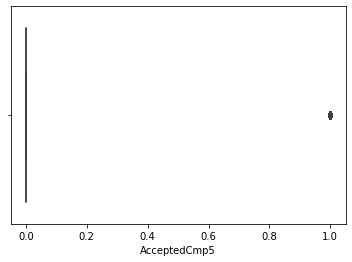

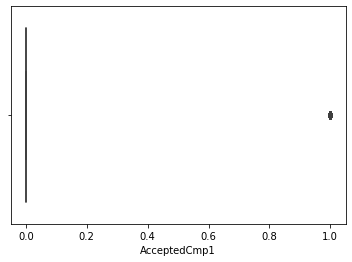

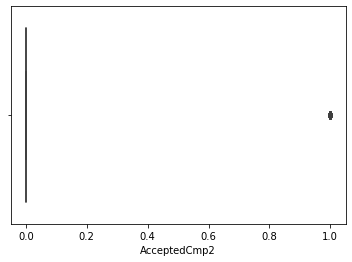

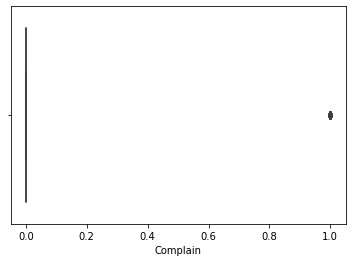

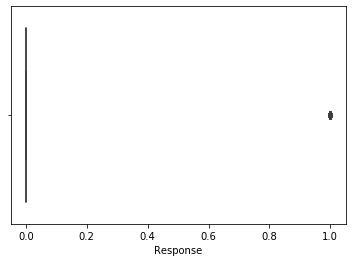

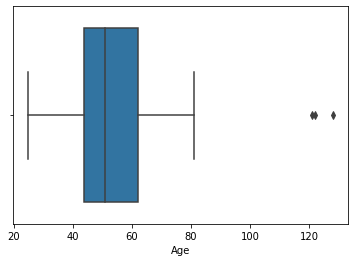

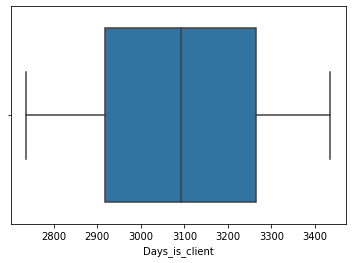

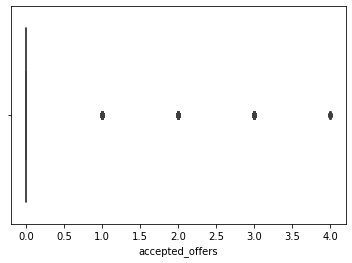

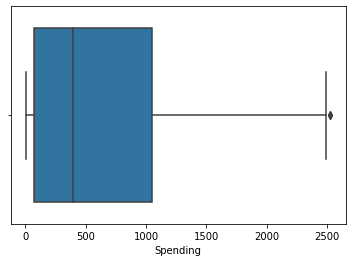

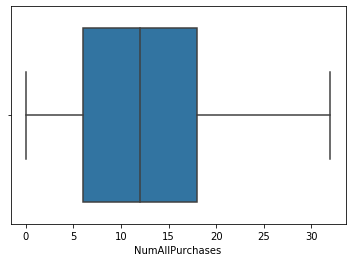

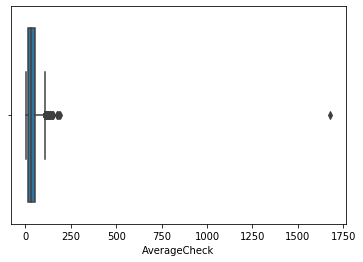

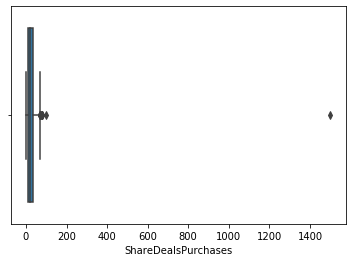

In [19]:
# this function will take a dataframe and display all boxplots for each nummerical column

def detect_outliers(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.boxplot(frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.boxplot(frame[i])
            plt.show()
            
detect_outliers(data)

### closer look to the outliers

In [20]:
data[data ['Income'] > 140000]

Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
164          PhD        Married  157243.0        0         1  2014-03-01   
617          PhD       Together  162397.0        1         1  2013-06-03   
655   Graduation       Divorced  153924.0        0         0  2014-02-07   
687          PhD        Married  160803.0        0         0  2012-08-04   
1300      Master       Together  157733.0        1         0  2013-06-04   
1653  Graduation       Together  157146.0        0         0  2013-04-29   
2132         PhD        Married  156924.0        0         0  2013-08-29   
2233  Graduation       Together  666666.0        1         0  2013-06-02   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  \
164        98        20          2             1582  ...             0   
617        31        85          1               16  ...             0   
655        81         1          1                1  ...             0   
687        21        55         16             1622  ...             0   
1300       37        39          1                9  ...             0   
1653       13         1          0             1725  ...             0   
2132       85         2          1                2  ...             0   
2233       23         9         14               18  ...             0   

      Complain  Response  Age  Days_is_client  accepted_offers  Spending  \
164          0         0   48            2856                0      1608   
617          0         0   45            3127                0       107   
655          0         0   46            2878                0         6   
687          0         0   39            3430                0      1717   
1300         0         0   50            3126                0        59   
1653         0         0   44            3162                0      1730   
2132         0         0   72            3040                0         8   
2233         0         0   44            3128                0        62   

      NumAllPurchases  AverageCheck  ShareDealsPurchases  
164                22          73.1                 68.2  
617                 1         107.0                  0.0  
655                 0           inf                  0.0  
687                29          59.2                 51.7  
1300                2          29.5                  0.0  
1653               28          61.8                  0.0  
2132                0           inf                  0.0  
2233                7           8.9                 57.1  

[8 rows x 32 columns]

In [21]:
data = data[data ['Income'] < 140000] # remove outliers

In [22]:
data[data ['Age'] > 110]


Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
192  2n Cycle       Divorced  36640.0        1         0  2013-09-26       99   
239  2n Cycle         Single  60182.0        0         1  2014-05-17       23   
339       PhD       Together  83532.0        0         0  2013-09-26       36   

     MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  Complain  \
192        15          6                8  ...             0         1   
239         8          0                5  ...             0         0   
339       755        144              562  ...             0         0   

     Response  Age  Days_is_client  accepted_offers  Spending  \
192         0  121            3012                0        65   
239         0  128            2779                0        22   
339         0  122            3012                1      1853   

     NumAllPurchases  AverageCheck  ShareDealsPurchases  
192                5          13.0                 20.0  
239                3           7.3                 33.3  
339               14         132.4                  7.1  

[3 rows x 32 columns]

In [23]:
data = data[data ['Age'] < 110] # remove outliers

In [24]:
data[data ['Spending'] > 2500]


Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
1179      Master         Single  90638.0        0         0  2014-02-13   
1492  Graduation       Together  87679.0        0         0  2013-07-27   
1572      Master         Single  90638.0        0         0  2014-02-13   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  \
1179       29      1156        120              915  ...             0   
1492       62      1259        172              815  ...             0   
1572       29      1156        120              915  ...             0   

      Complain  Response  Age  Days_is_client  accepted_offers  Spending  \
1179         0         0   30            2872                1      2525   
1492         0         1   33            3073                3      2524   
1572         0         1   30            2872                1      2525   

      NumAllPurchases  AverageCheck  ShareDealsPurchases  
1179               17         148.5                  5.9  
1492               28          90.1                  3.6  
1572               17         148.5                  5.9  

[3 rows x 32 columns]

In [25]:
data = data[data ['Spending'] < 2500]

In [26]:
data[data ['AverageCheck'] > 1500] # remove outliers

Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
981   Graduation       Divorced   4861.00        0         0  2014-06-22   
1245  Graduation       Divorced   1730.00        0         0  2014-05-18   
1524  Graduation         Single   3502.00        1         0  2013-04-13   
1846         PhD        Married   4023.00        1         1  2014-06-23   
2228    2n Cycle       Together  47633.19        0         0  2012-08-12   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  \
981        20         2          1                1  ...             0   
1245       65         1          1                3  ...             0   
1524       56         2          1                1  ...             0   
1846       29         5          0                1  ...             0   
2228       53        32          2             1607  ...             0   

      Complain  Response  Age  Days_is_client  accepted_offers  Spending  \
981          0         0   56            2743                0         6   
1245         0         0   50            2778                0         8   
1524         0         0   48            3178                0         5   
1846         0         0   58            2742                0         9   
2228         0         0   43            3422                1      1679   

      NumAllPurchases  AverageCheck  ShareDealsPurchases  
981                 0           inf                  0.0  
1245                0           inf                  inf  
1524                0           inf                  0.0  
1846                0           inf                  inf  
2228                1        1679.0                  0.0  

[5 rows x 32 columns]

In [27]:
data = data[data ['AverageCheck'] < 1500] # remove outliers

In [28]:
data[data ['ShareDealsPurchases'] > 1400] 

Education Marital_Status  Income  Kidhome  Teenhome Dt_Customer  \
1042  Graduation         Single  8028.0        0         0  2012-09-18   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  \
1042       62        73         18               66  ...             0   

      Complain  Response  Age  Days_is_client  accepted_offers  Spending  \
1042         0         0   30            3385                0       178   

      NumAllPurchases  AverageCheck  ShareDealsPurchases  
1042                1         178.0               1500.0  

[1 rows x 32 columns]

In [29]:
data = data[data ['ShareDealsPurchases'] < 1400] # remove outliers

In [30]:
# since the following outliers related to people spending I feel they are real values that doesnt need to be removed 

#MntWines > 1200
#Mntfruits > 77
#MntMeatProducts > 600
#MntFishProduct > 120
#MntSweetProduct > 80
#MntGoldProds > 130


Education
Graduation    1119
PhD            480
Master         367
2n Cycle       200
Basic           54
Name: Education, dtype: int64


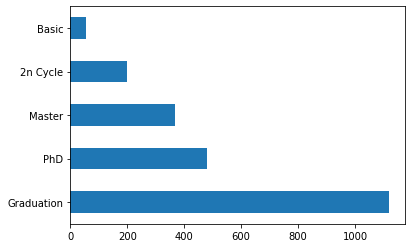

In [31]:
# plot education level distribution
print("Education")
print(data['Education'].value_counts())
data['Education'].value_counts().plot(kind = 'barh')

Marital_Status
Married     860
Together    573
Single      475
Divorced    228
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


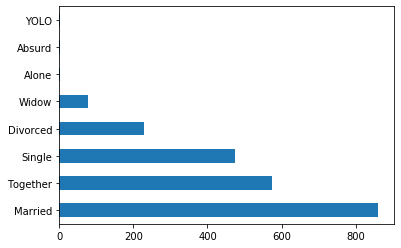

In [32]:
# plot Marital_Status distribution

print("Marital_Status")
print(data['Marital_Status'].value_counts())
data['Marital_Status'].value_counts().plot(kind = 'barh')

0    1888
1     332
Name: Response, dtype: int64
Response


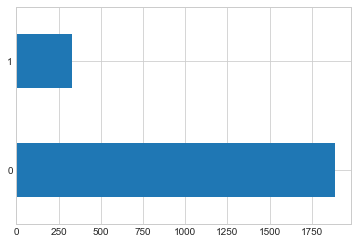

In [151]:
# plot the target column distribution
print(data['Response'].value_counts())
data['Response'].value_counts().plot(kind = 'barh')
print("Response")

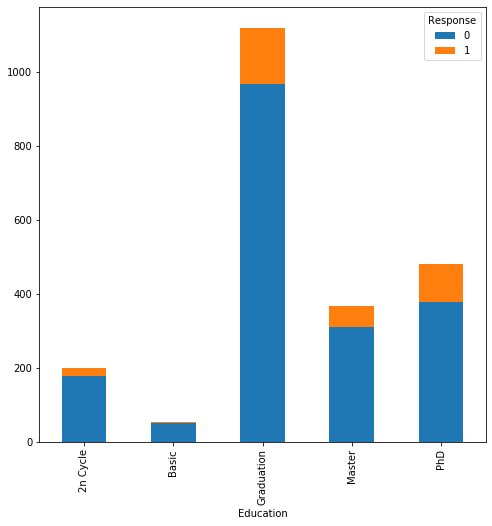

In [34]:
# responding from each educational level
pd.crosstab(index= data['Education'] , columns=data['Response']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

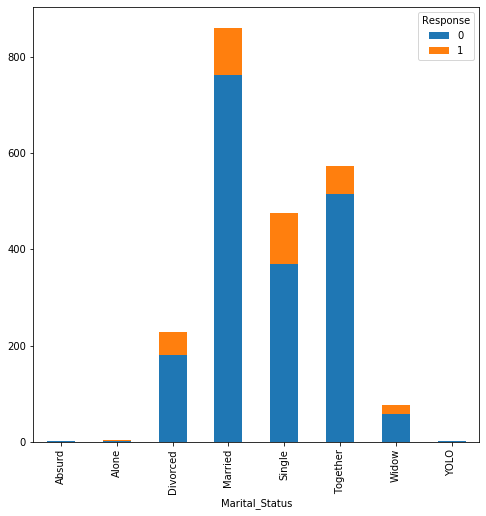

In [35]:
# responding from each Marital Status

pd.crosstab(index= data['Marital_Status'] , columns=data['Response']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

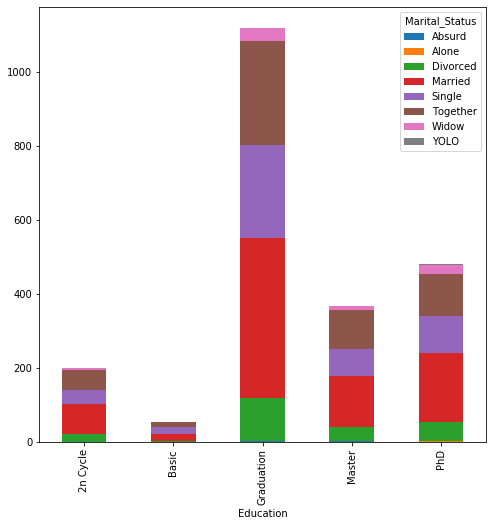

In [36]:
# relation between Marital_Status and educational level
pd.crosstab(index= data['Education'] , columns=data['Marital_Status']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

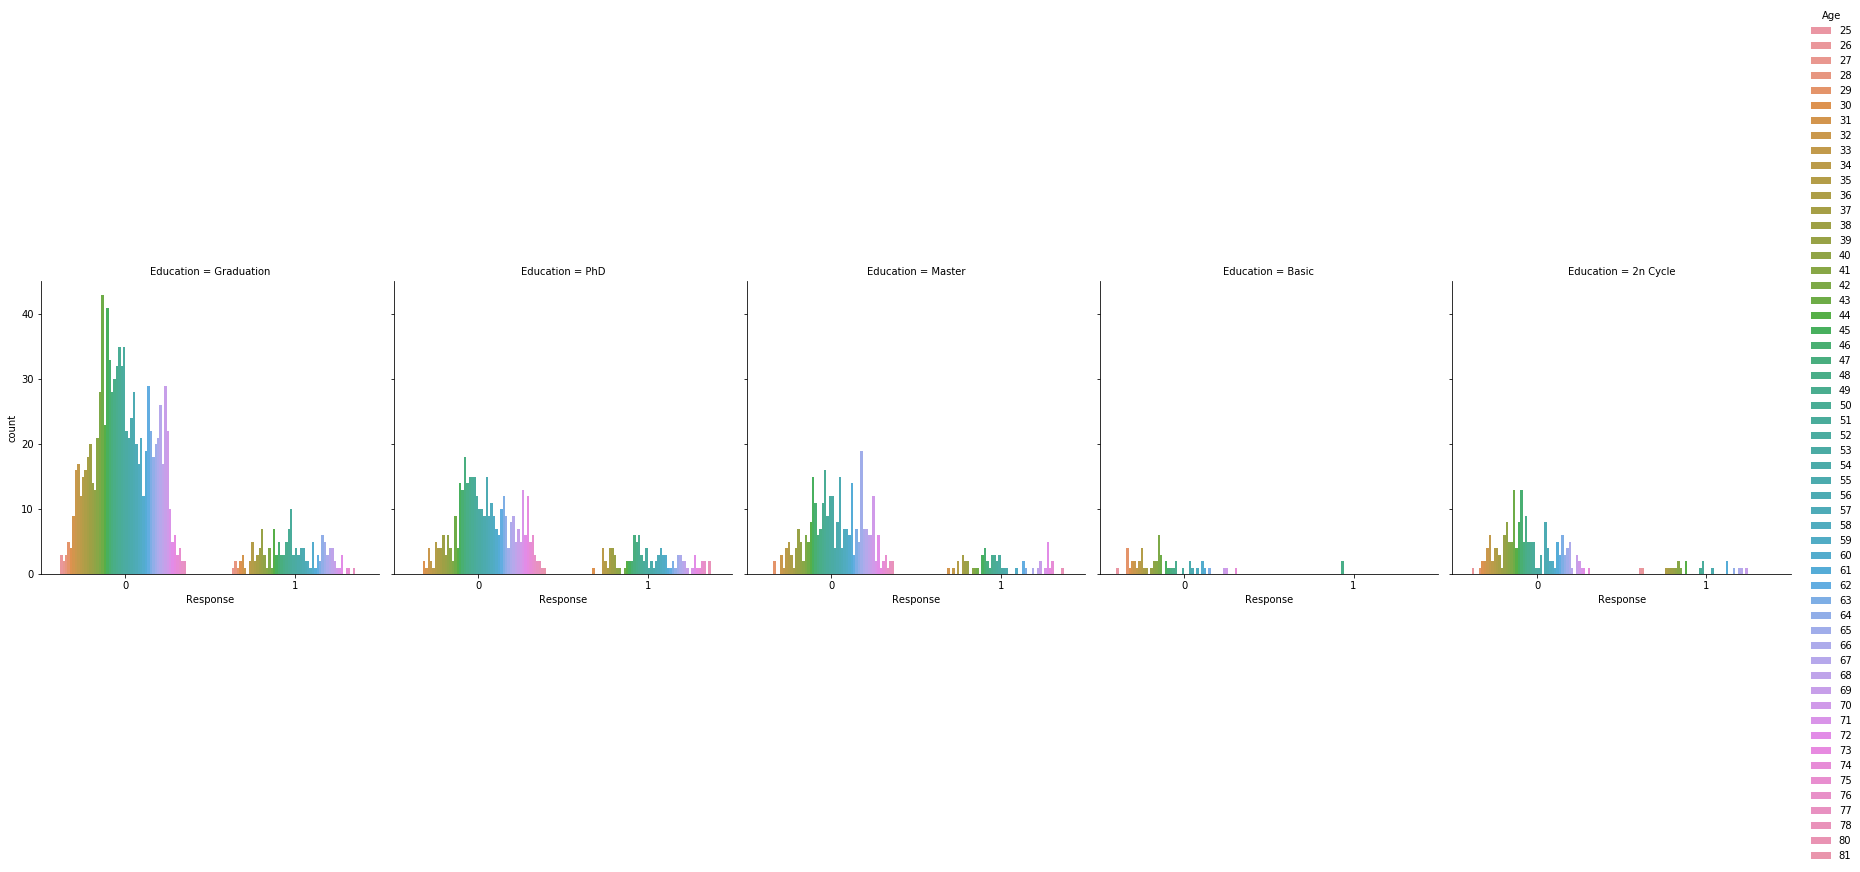

In [37]:
# Responses from each Age and educational level

sns.catplot(x='Response', hue='Age', col='Education', data=data, kind='count')

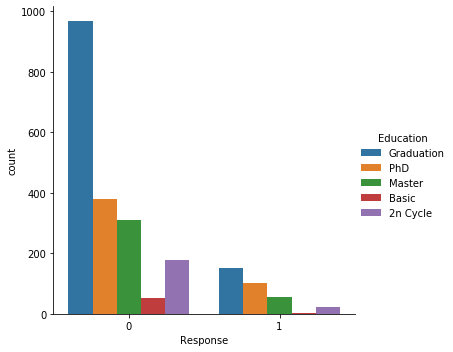

In [38]:
# Responses from each educational level

sns.catplot(x='Response', hue='Education', data=data, kind='count')

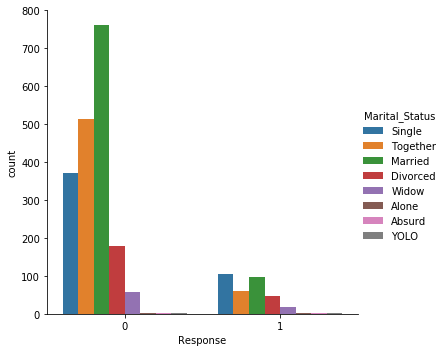

In [39]:
# Responses from each Marital Status

sns.catplot(x='Response', hue='Marital_Status', data=data, kind='count')

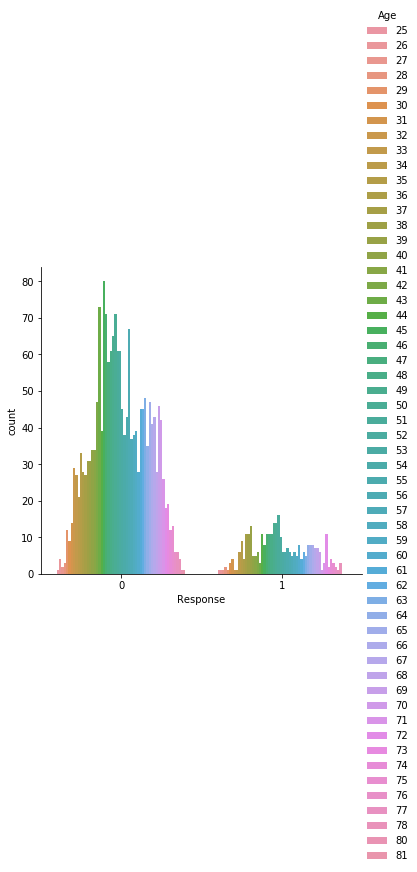

In [40]:
# Responses from different ages

sns.catplot(x='Response', hue='Age', data=data, kind='count')

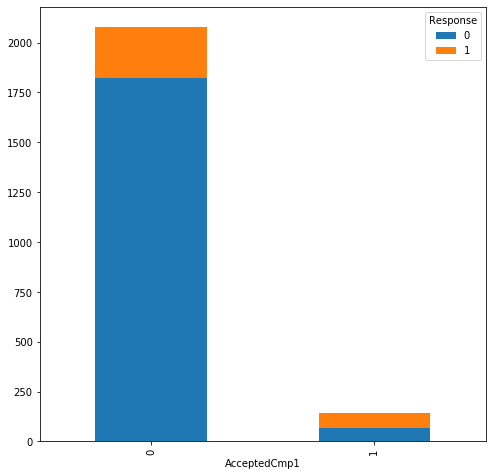

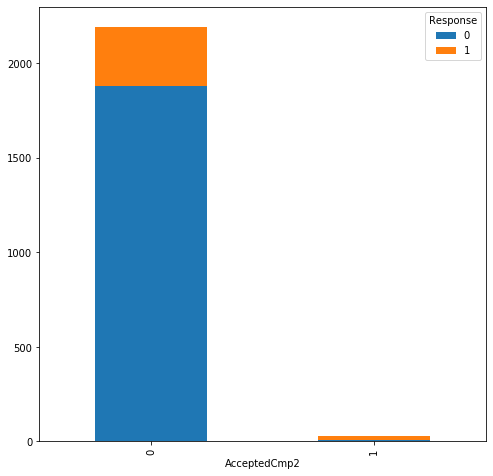

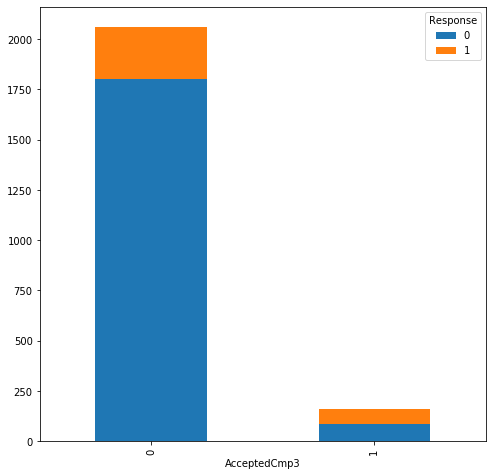

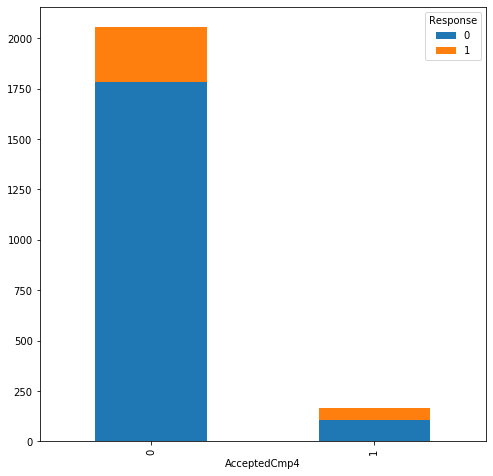

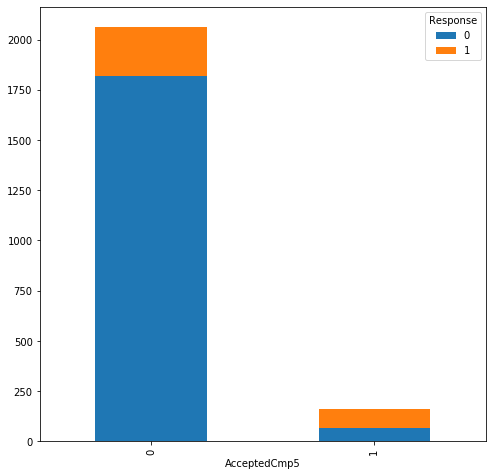

In [41]:
# the relation between accepting each campain and responding to the current one 
features = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
for f in features:
    x = pd.crosstab(data[f] , data['Response']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [42]:
#display columns names
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Days_is_client', 'accepted_offers',
       'Spending', 'NumAllPurchases', 'AverageCheck', 'ShareDealsPurchases'],
      dtype='object')

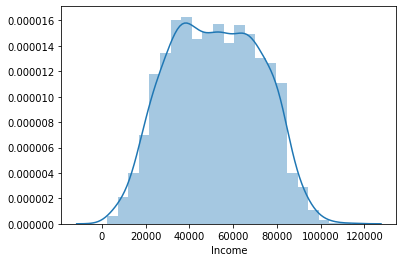

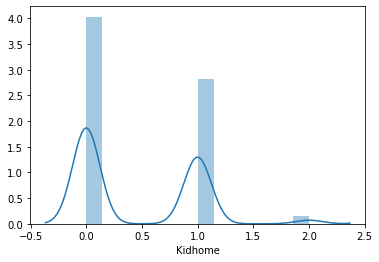

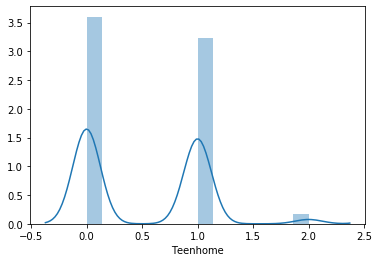

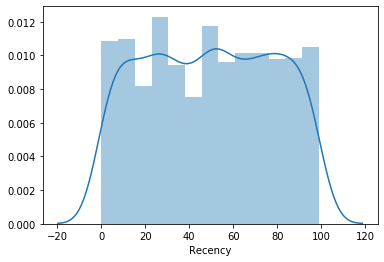

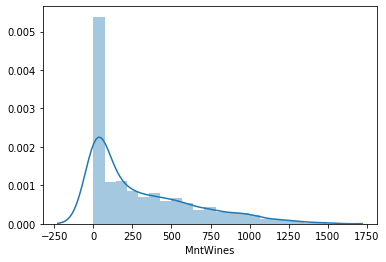

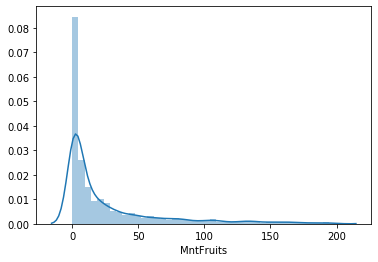

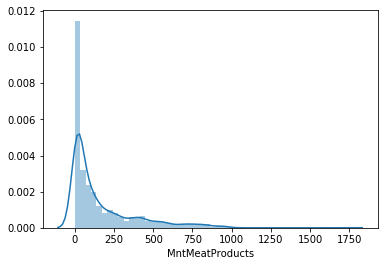

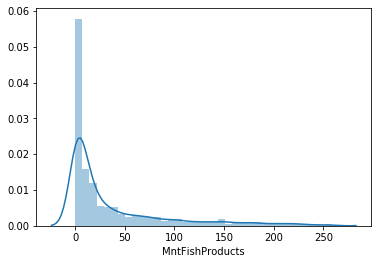

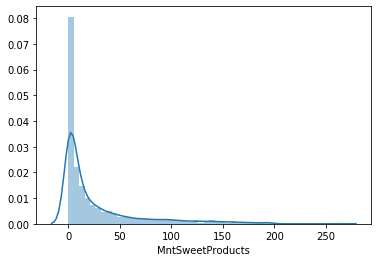

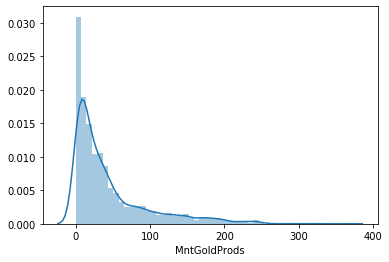

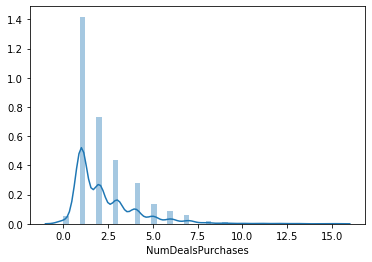

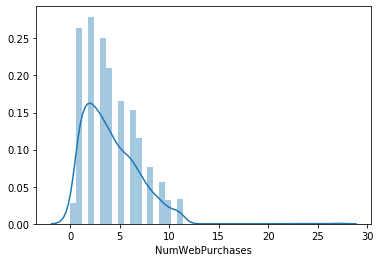

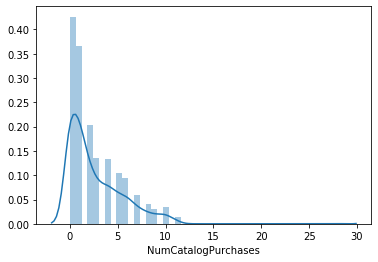

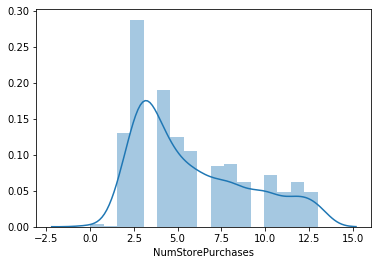

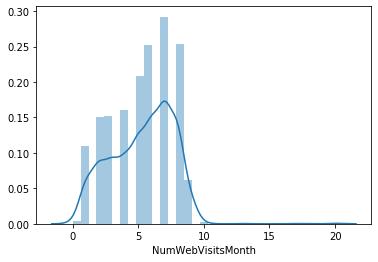

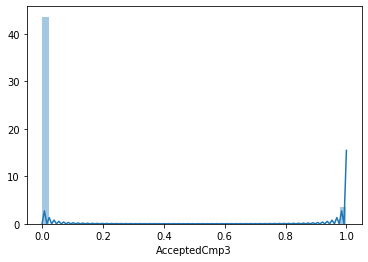

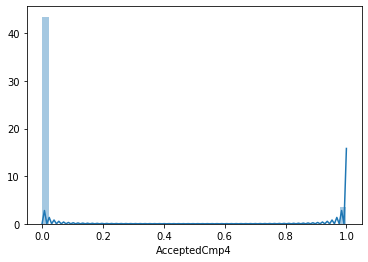

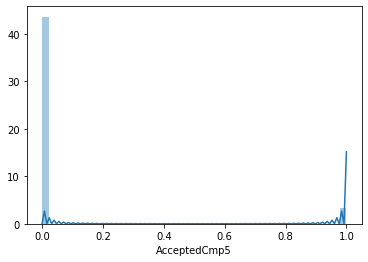

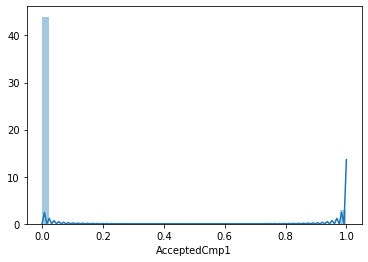

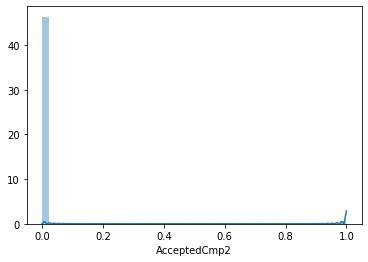

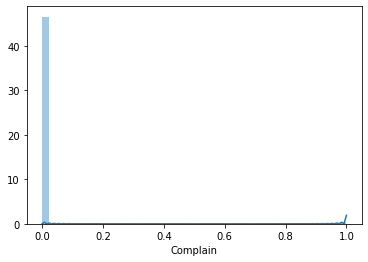

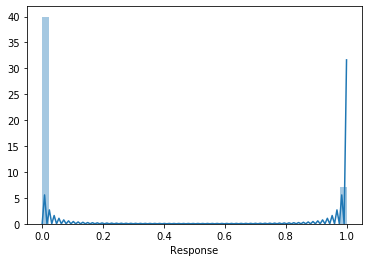

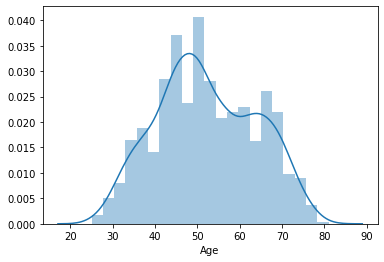

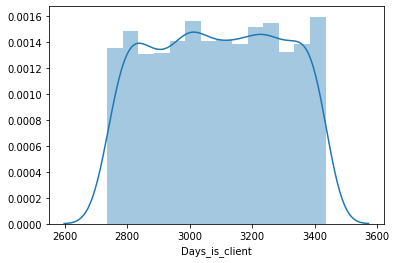

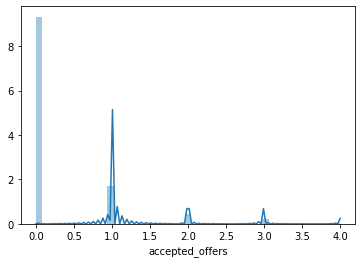

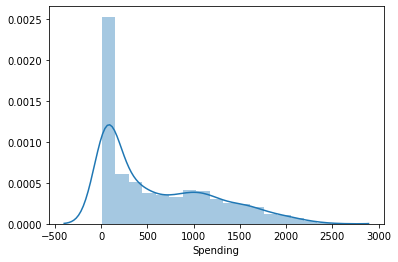

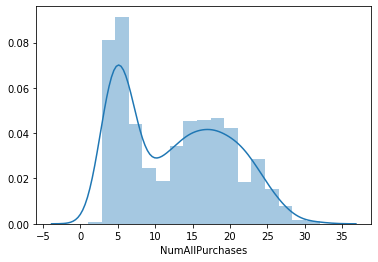

In [43]:
#select only numerical columns
numerical = ['Income', 'Kidhome',
       'Teenhome','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response',
       'Age', 'Days_is_client', 'accepted_offers', 'Spending',
       'NumAllPurchases']
# plot histogram for each numerical feature 
for f in numerical:
    sns.distplot(data[f])
    plt.show()

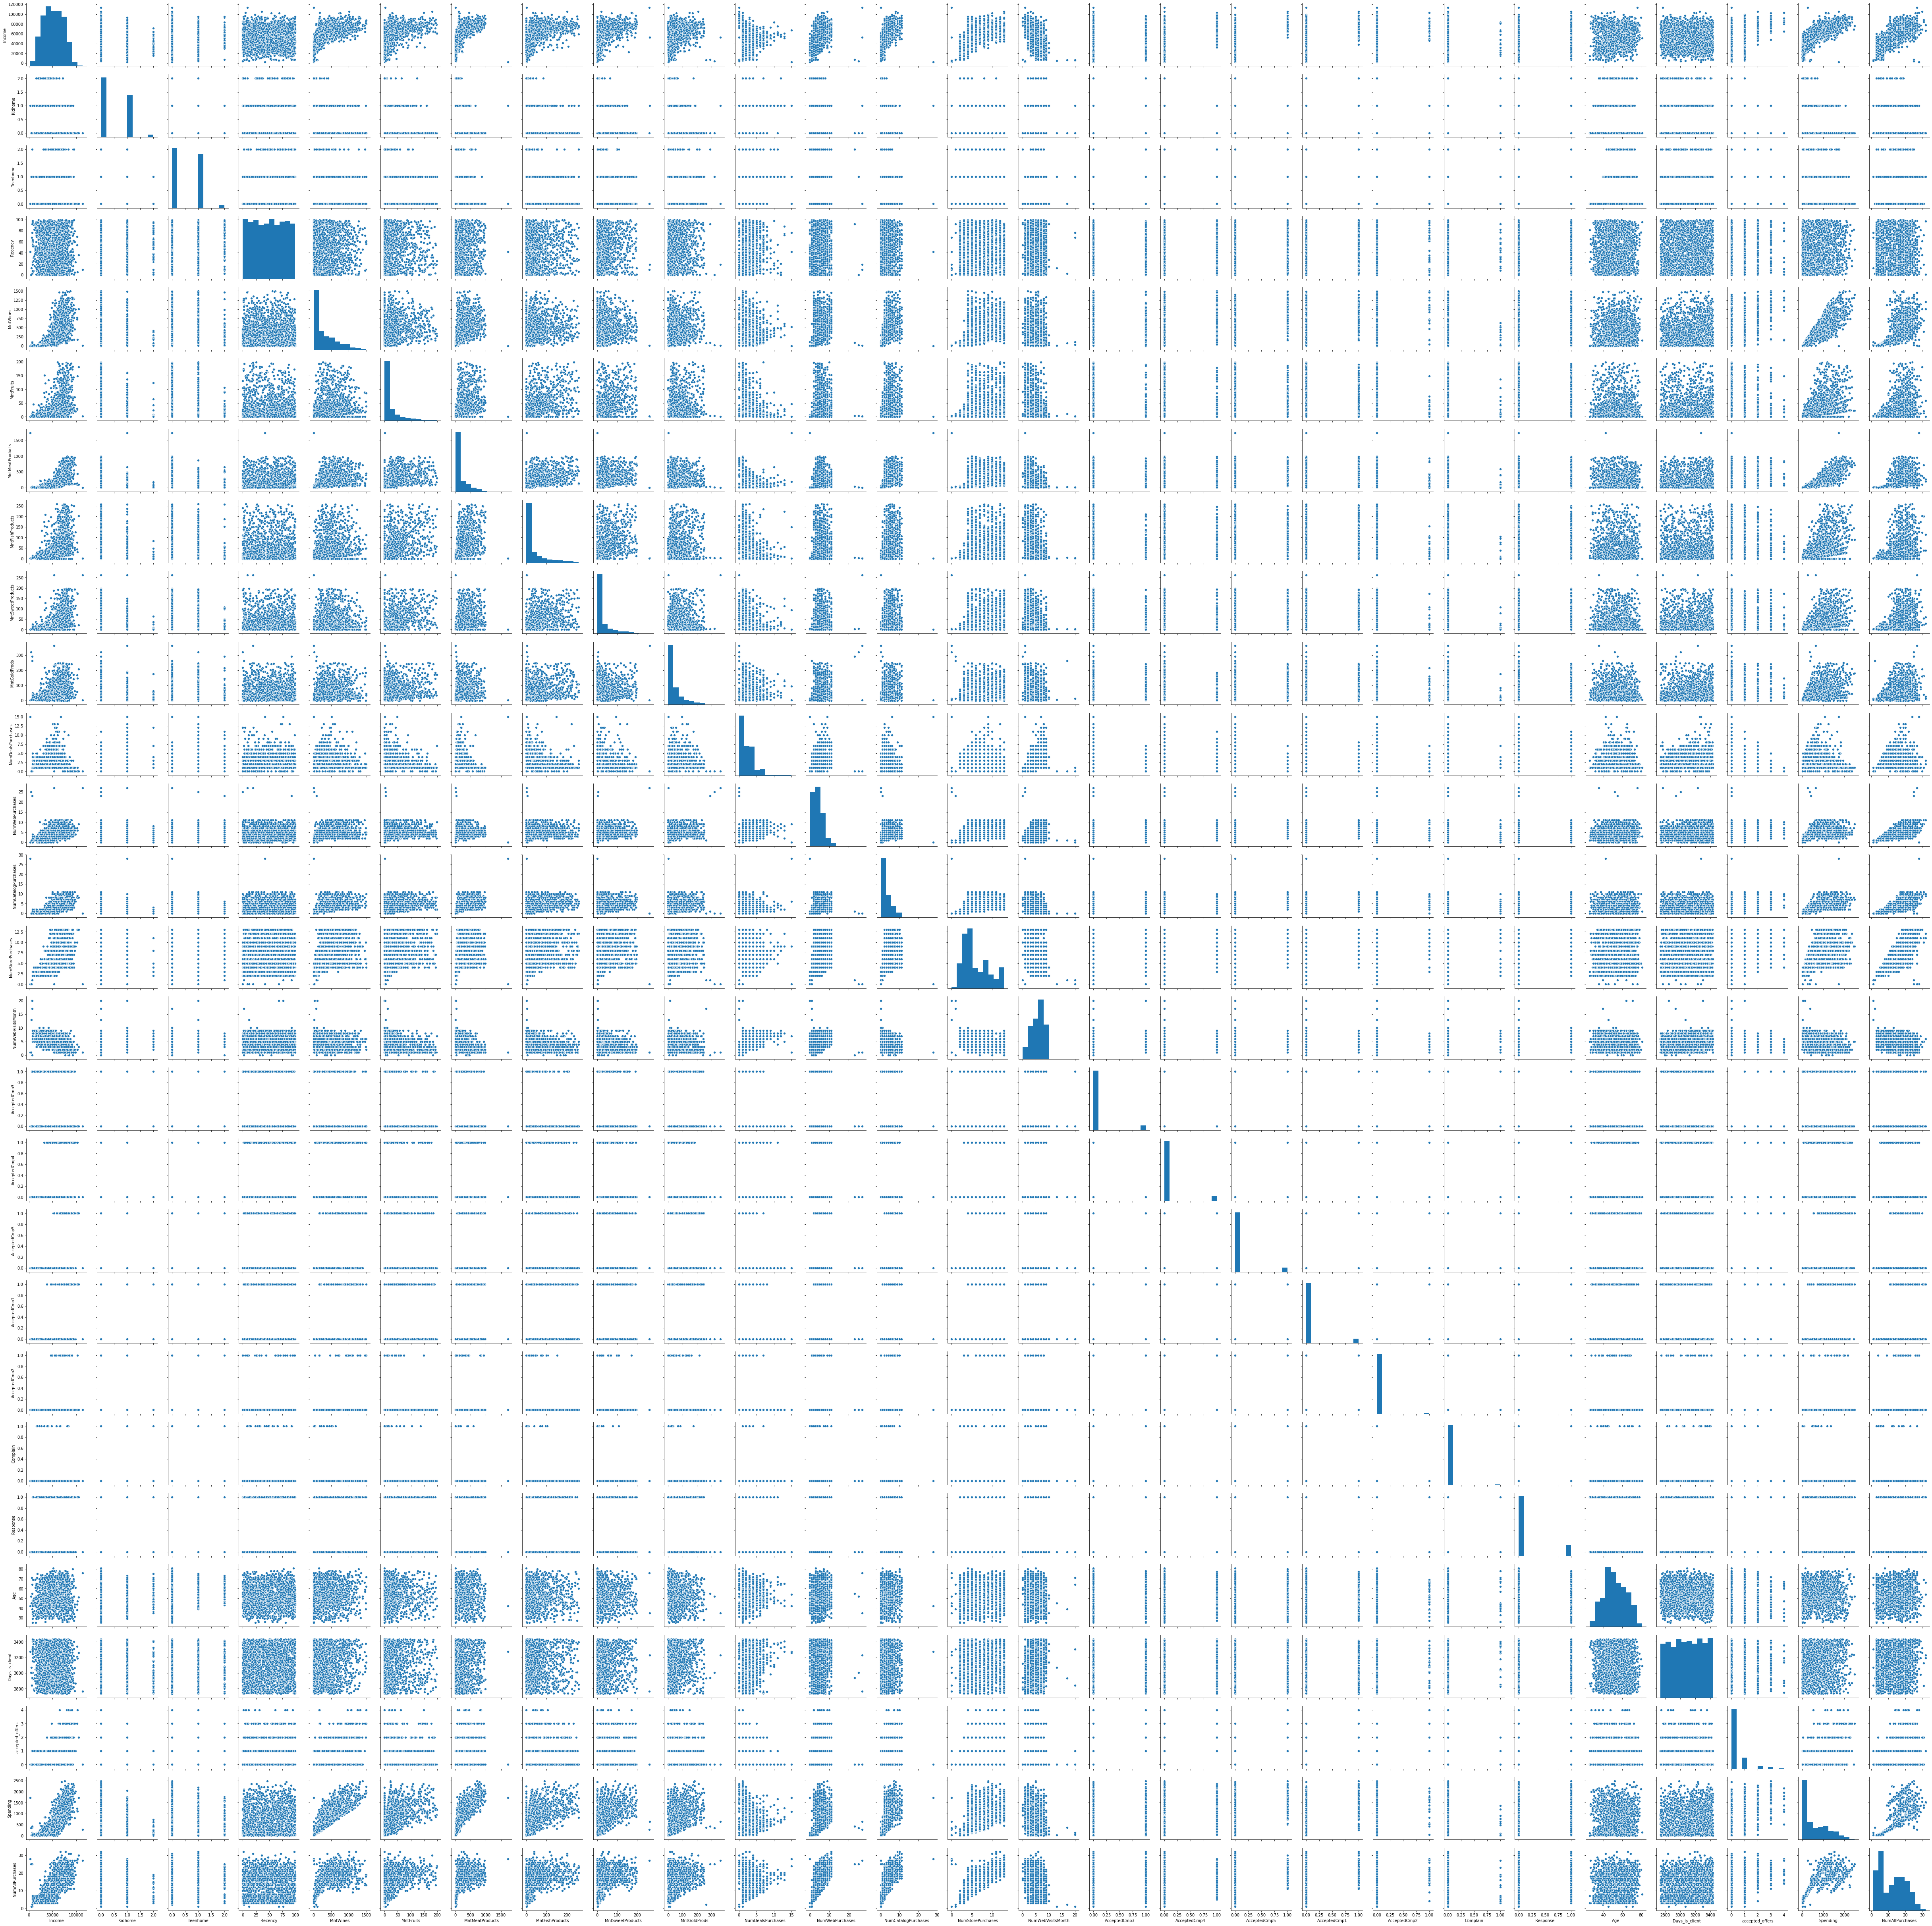

In [44]:
# plot pairplots 

sns.pairplot(data[numerical])

## Encoding categorical data

In [45]:
edu_mapper = {"Basic":1, "2n Cycle":2, "Graduation":3, "Master":4, "PhD":5} # mapping educational levels
data["Education"] = data["Education"].replace(edu_mapper)

In [46]:
data = pd.get_dummies(data) # one hot encoding for other categorical data (Marital_Status)

## Investigating responding factors

In [48]:
data.corr()['Response'].sort_values() # calculate the correlation between features and the target

Recency                   -0.199713
Teenhome                  -0.155324
ShareDealsPurchases       -0.082032
Kidhome                   -0.079485
Marital_Status_Married    -0.079372
Marital_Status_Together   -0.077044
Age                       -0.016050
NumWebVisitsMonth         -0.000747
Complain                   0.000120
NumDealsPurchases          0.008149
Marital_Status_Alone       0.018957
Marital_Status_YOLO        0.029508
Marital_Status_Absurd      0.029508
NumStorePurchases          0.032475
Marital_Status_Widow       0.051665
Marital_Status_Divorced    0.057846
Education                  0.100208
Marital_Status_Single      0.104606
MntFishProducts            0.108284
MntSweetProducts           0.111249
MntFruits                  0.119614
MntGoldProds               0.138788
NumWebPurchases            0.145483
NumAllPurchases            0.161528
AcceptedCmp2               0.169711
Income                     0.170469
AcceptedCmp4               0.178516
Days_is_client             0

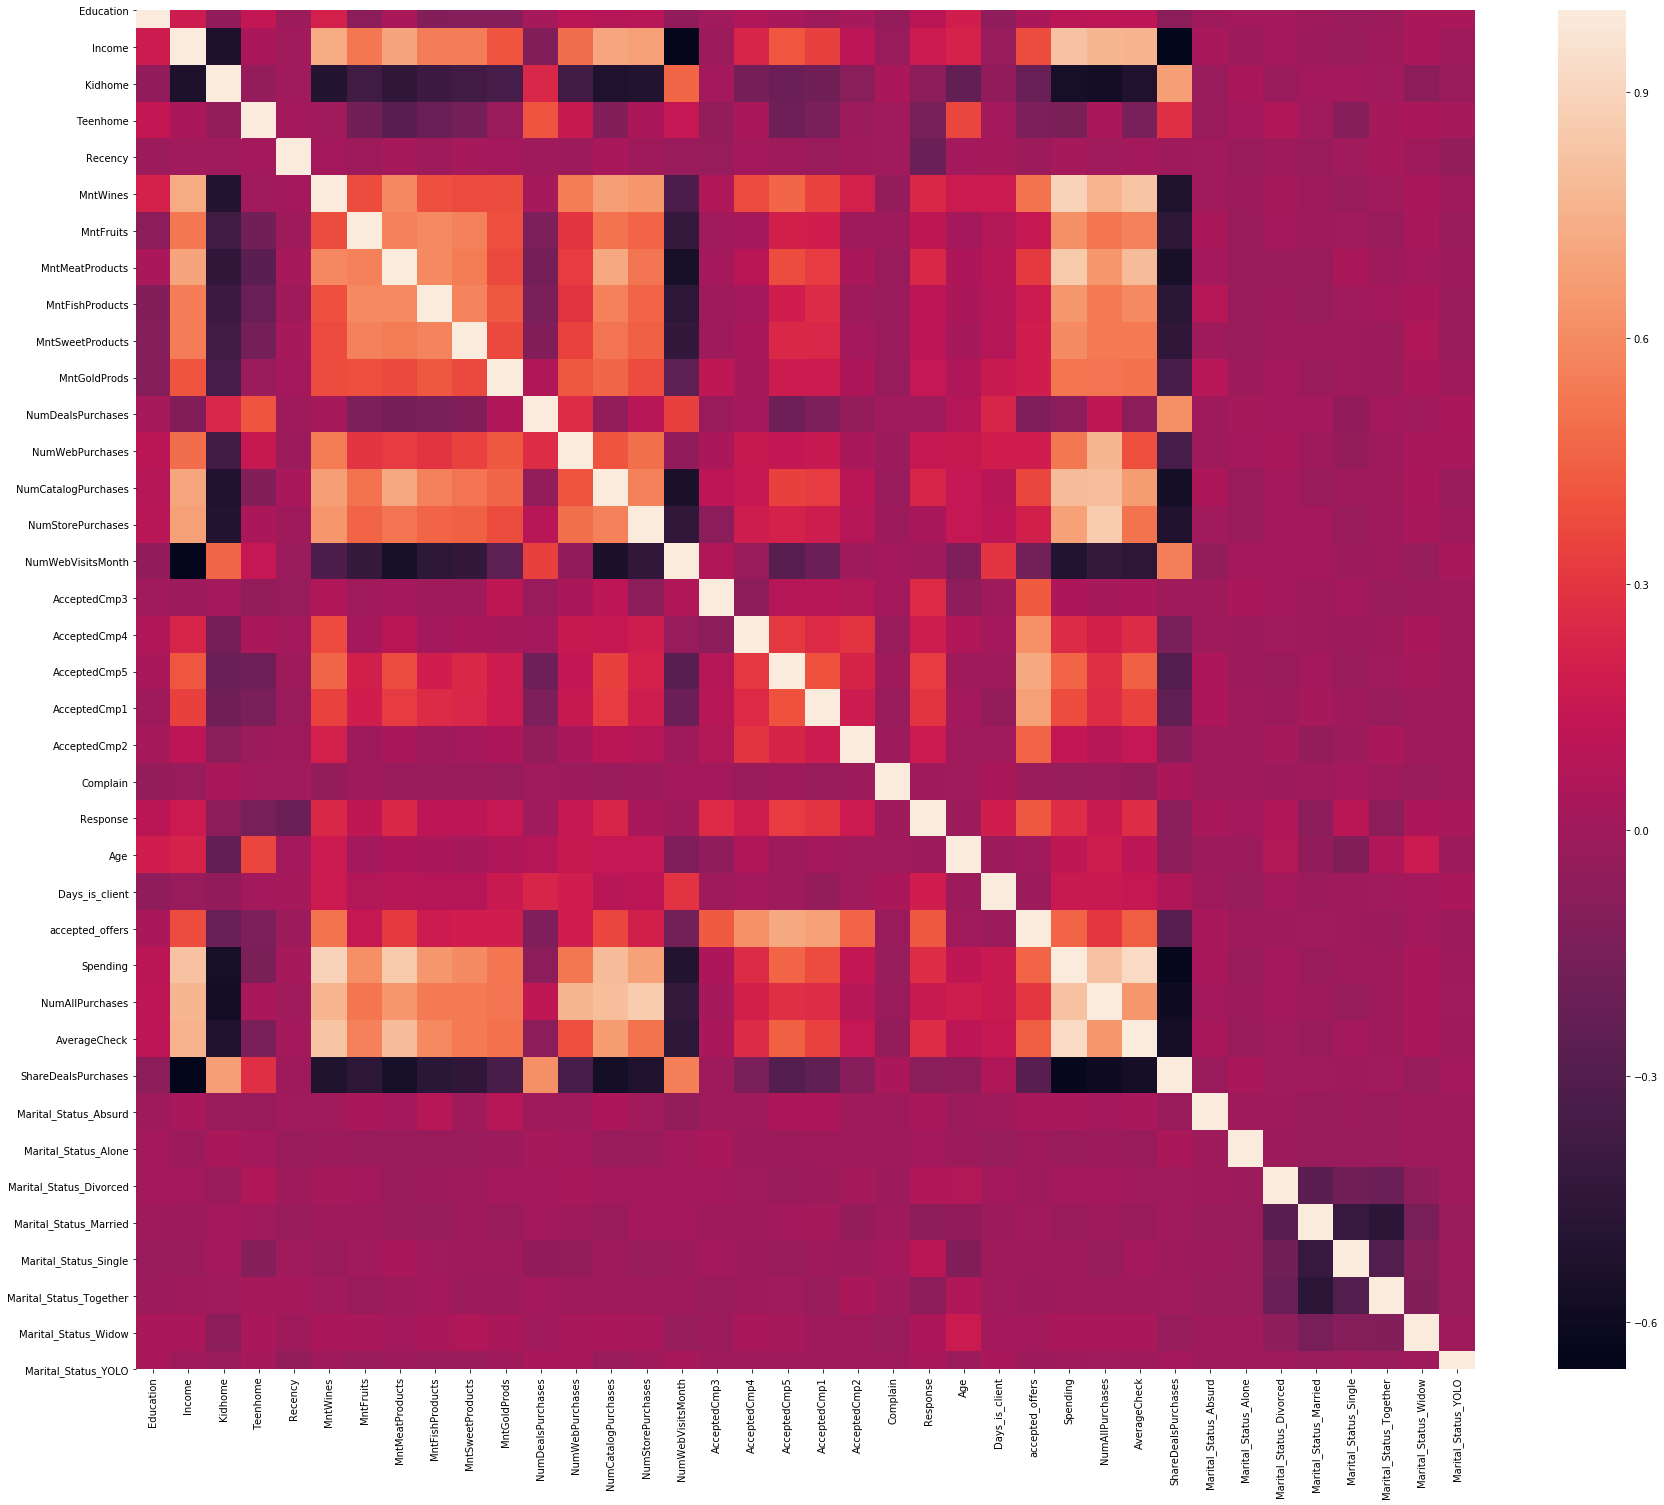

In [49]:
# plot the correlation between features
plt.figure(figsize=(30,25))
dataplot = sns.heatmap(data.corr())

In [50]:
# Function that receives a dataframe, list of feature names, name of target and DecisionTreeClassifier paramethers and
# returns a df with all features with a worth higher than zero and plots it.
def dta_feat_worth(df, feat_list, target, max_depth, min_samples_split, min_samples_leaf):
    
    # Preparing the Input Data for the DTA
    X = data.loc[:, feat_list].values
    y = data[target].values
    
    
    # Run the estimation through DecisionTreeClassifier
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=50, 
                                   min_samples_leaf = 20, random_state=11)
    # Fits the DTClassifier with our data
    dtree = dtree.fit(X, y)
    
    
    # Create a dictionary with the name of all features and its importances according to the DTA estimation
    fi = dict(zip(columns, dtree.feature_importances_))
    # Then creates a Dataframe with it
    fidf = pd.DataFrame(fi, index=["worth"])
    # Transpose it because the way it is created it is on the other orientation
    fidf_t = fidf.transpose().sort_values(by="worth", ascending=False)
     # Removes features with worth 0 and puts it into a df called worth_df
    worth_df = fidf_t[fidf_t.worth>0]

    # Uses seaborn to create a plot with the worth of features
    plt.style.use('seaborn-whitegrid')
    axes = worth_df.sort_values(by="worth").plot.barh(y='worth', color='gray', legend=False)
    axes.set_title("Worth of features")
    # Repositions legend
    plt.legend(loc='lower right')
    plt.show()
    
    return worth_df

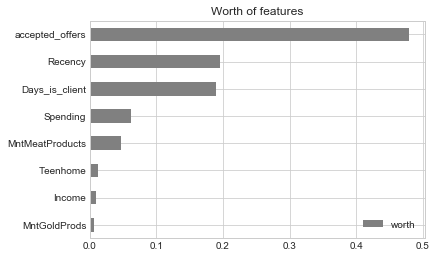

worth
accepted_offers  0.478807
Recency          0.195121
Days_is_client   0.189720
Spending         0.062027
MntMeatProducts  0.047036
Teenhome         0.011753
Income           0.009641
MntGoldProds     0.005895

In [52]:
# plot the top features
columns = data[numerical].columns
columns = columns.drop("Response")

dta_feat_worth(data, columns, "Response", 5, 100, 10)

In [53]:
#select only the top features (exclude MntMeatProducts, and MntGoldProds because they are highly corelated with Spending)
X = data[['accepted_offers','Recency','Days_is_client','Spending','Teenhome','Income']]
y = data['Response']

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 2239
Data columns (total 6 columns):
accepted_offers    2220 non-null int64
Recency            2220 non-null int64
Days_is_client     2220 non-null int64
Spending           2220 non-null int64
Teenhome           2220 non-null int64
Income             2220 non-null float64
dtypes: float64(1), int64(5)
memory usage: 201.4 KB


## Over sampling 

In [56]:
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 1888, 1: 332})
Resampled dataset shape Counter({1: 1888, 0: 1888})


## Scaling

In [57]:
X_columns  = X.columns 
Scaler = MinMaxScaler()
X_Scaled = pd.DataFrame(Scaler.fit_transform(X))
X_Scaled.columns = X_columns

In [58]:
X_Scaled.head()

accepted_offers   Recency  Days_is_client  Spending  Teenhome    Income
0              0.0  0.585859        0.948498  0.649314       0.0  0.500427
1              0.0  0.383838        0.161660  0.007667       0.5  0.394449
2              0.0  0.262626        0.446352  0.309927       0.0  0.621510
3              0.0  0.262626        0.198856  0.018160       0.0  0.217447
4              0.0  0.949495        0.230329  0.167070       0.0  0.501820

### Splitting Data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.33, random_state=42)

In [60]:
print ('X_train ' , X_train.shape)
print ('X_test ' , X_test.shape)
print ('y_train ' , y_train.shape)
print ('y_test ' , y_test.shape)
print ('X ' , X.shape)
print ('y ' , y.shape)

X_train  (1487, 6)
X_test  (733, 6)
y_train  (1487,)
y_test  (733,)
X  (2220, 6)
y  (2220,)


# Modeling

## KNN

In [152]:
## Parameter Tuning
error_rate = []
# Will take some time
for i in range(1,40):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

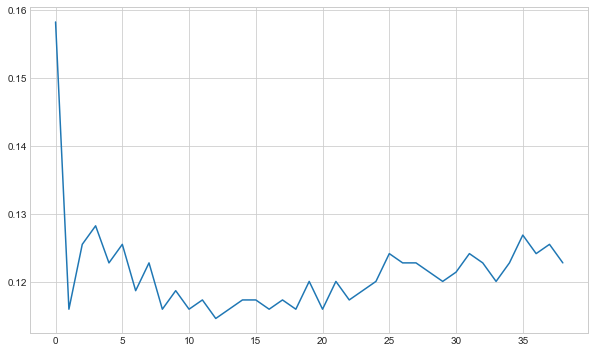

In [153]:
#use elbow method to choose the best value of k by plotting the error values
plt.figure(figsize=(10,6))
plt.plot(error_rate)

In [142]:
#we can see that the best K value is 8 
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train) # Fitting the model
print ("Training cross validation score", cross_val_score(knn, X_train, y_train, cv=5).mean()) # training score

Training cross validation score 0.8729012722301313


In [143]:
knn_predicted = knn.predict(X_test) 

In [145]:
print(metrics.accuracy_score(y_test, knn_predicted)) # testing score

0.8772169167803547


## SVM

### Parameter Tuning


In [102]:
## Grid search to find the best parameters (kernel,gamma,C)
np.logspace(-5, 2, 20)
parm_grid = {'kernel':['rbf','linear'] , 'gamma': np.logspace(-5, 2, 20),
            'C':[0.1,0.5, 0.7, 1, 10]}
svm_rbf = svm.SVC(kernel='rbf')
grid = GridSearchCV(svm_rbf, parm_grid, cv=5, verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 0.7, 1, 10],
                         'gamma': array([1.00000000e-05, 2.33572147e-05, 5.45559478e-05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02]),
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [103]:
grid.best_params_

{'C': 10, 'gamma': 1.438449888287663, 'kernel': 'rbf'}

In [104]:
grid.best_score_

0.881630623912503

### Training and testing

In [106]:
# choose the best parameters: 'C': 10, 'gamma': 1.438449888287663, 'kernel': 'rbf'
svm_rbf = svm.SVC(kernel='rbf', C = 10, gamma = 1.438449888287663)
svm_rbf.fit(X_train, y_train)
#cross_val_score(svm_rbf, X_train, y_train, cv=5).mean()
print ("Training cross validation score", cross_val_score(svm_rbf, X_train, y_train, cv=5).mean()) # trining score

Training cross validation score 0.881630623912503


In [107]:
svm_rbf_predicted = svm_rbf.predict(X_test)

In [108]:
print(metrics.accuracy_score(y_test, svm_rbf_predicted))# testing score

0.878581173260573


## Decision Tree

### Parameter tuning

In [77]:
# Grid search to find the best parameters (max depth)
parm_grid2 = {'max_depth':[3,4,5,6,7]}
grid2 = GridSearchCV(DecisionTreeClassifier(), parm_grid2, cv=10, verbose = 1)
grid2.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7]}, verbose=1)

In [78]:
grid2.best_params_

{'max_depth': 4}

In [79]:
grid.best_score_

0.881630623912503

### Training and testing

In [81]:
# select the best depth 4
dtree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
#cross_val_score(dtree, X_train, y_train, cv=10).mean()
print ("Training cross validation score", cross_val_score(dtree, X_train, y_train, cv=5).mean())

Training cross validation score 0.8634917406729488


In [82]:
dtree_predicted = dtree.predict(X_test)

In [83]:
print(metrics.accuracy_score(y_test, dtree_predicted))

0.8676671214188267


## AdaBoost

In [136]:
AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=200)
AdaBoost.fit(X_train, y_train)
print ("Training cross validation score", cross_val_score(AdaBoost, X_train, y_train, cv=5).mean())

Training cross validation score 0.8487063023975775


In [137]:
AdaBoost_predicted = AdaBoost.predict(X_test)

In [138]:
print(metrics.accuracy_score(y_test, AdaBoost_predicted))

0.8608458390177354


## Logistic Regression

### Parameter tuning 

In [147]:
# Grid search to find the best parameters (C, Penalty, Solver)
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [88]:
clf.best_params_

{'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'liblinear'}

In [89]:
clf.best_score_

0.8802951212347185

### Training and testing

In [90]:
# use the best parameters
log_reg = LogisticRegression(C = 0.615848211066026, penalty= 'l2', solver = 'liblinear').fit(X_train,y_train)
print ("Training cross validation score", cross_val_score(log_reg, X_train, y_train, cv=5).mean())

Training cross validation score 0.8802951212347185


In [91]:
log_reg_predicted = log_reg.predict(X_test)

In [92]:
print(metrics.accuracy_score(y_test, log_reg_predicted))

0.8840381991814461


## Evaluate the best algorithm (Logistic Regression)

In [154]:
#display classification report
print(classification_report(y_test, log_reg_predicted))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       623
           1       0.75      0.35      0.47       110

    accuracy                           0.88       733
   macro avg       0.82      0.66      0.70       733
weighted avg       0.87      0.88      0.87       733



C:\Users\baso0\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


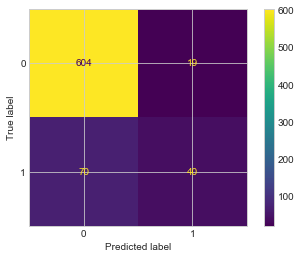

In [157]:
#display confusion matrix
plot_confusion_matrix(svm_rbf, X_test, y_test)  
plt.show()